<a href="https://colab.research.google.com/github/matadorfury28/Actividad4RegresionLineal/blob/main/Actividad5_DF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos librerias requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#carga archivo
from google.colab import files
files.upload()

Saving DF_Mexico.csv to DF_Mexico.csv


In [ ]:
#Carga de un archivo .xlsx desde un libro con varias páginas
data=pd.read_csv('DF_Mexico.csv')
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,NaN,https://a0.muscache.com/pictures/28353712/4379...,10531228,...,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
1,2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,...,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
2,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,...,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31
3,35797,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,44616,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.48,NaN,f,12,3,2,0,0.46


In [ ]:
df = pd.DataFrame(data)
columnas=['room_type', 'host_acceptance_rate', 'host_response_rate', 'price', 'review_scores_location', 'review_scores_cleanliness', 'availability_365', 'number_of_reviews', 'reviews_per_month', 'review_scores_communication']
df2 = df[columnas]
df2.head(4)

,room_type,host_acceptance_rate,host_response_rate,price,review_scores_location,review_scores_cleanliness,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
0,Entire home/apt,NaN,100%,"$1,434.00",5.00,4.95,324,21,0.19,4.95
1,Entire home/apt,NaN,NaN,$830.00,4.95,4.88,346,61,0.54,5.00
2,Entire home/apt,90%,100%,"$1,469.00",4.58,4.71,87,39,0.31,4.92
3,Entire home/apt,NaN,NaN,"$3,658.00",NaN,NaN,363,0,NaN,NaN


**Empieza el filtro de nulos para el grupo privado**

In [ ]:
filtro_privado = df2[df2['room_type'] == 'Private room']
filtro_privado.info

<bound method DataFrame.info of           room_type host_acceptance_rate host_response_rate      price  \
7      Private room                 100%               100%  $1,089.00   
16     Private room                   0%                NaN    $726.00   
17     Private room                  NaN                 0%    $375.00   
18     Private room                   0%                NaN  $2,835.00   
21     Private room                  NaN               100%  $1,244.00   
...             ...                  ...                ...        ...   
24200  Private room                  NaN                NaN  $1,280.00   
24213  Private room                  NaN                NaN    $750.00   
24215  Private room                 100%               100%    $600.00   
24218  Private room                 100%                NaN    $251.00   
24221  Private room                  96%                NaN    $533.00   

       review_scores_location  review_scores_cleanliness  availability_365  \
7

In [ ]:
#Se corroboran los valores nulos de las columnas con valores cuantitativos
valores_nulos = filtro_privado.isnull().sum()
valores_nulos

room_type                         0
host_acceptance_rate            933
host_response_rate             1439
price                             0
review_scores_location         1808
review_scores_cleanliness      1807
availability_365                  0
number_of_reviews                 0
reviews_per_month              1776
review_scores_communication    1807
dtype: int64

In [ ]:
#Primero se elimina el signo % para aplicar el remplazo de nulos
#filtro_privado['host_acceptance_rate']=filtro_privado['host_acceptance_rate'].astype(str)
filtro_privado['price']=filtro_privado['price'].str.replace('$', '')
filtro_privado['price']=filtro_privado['price'].str.replace(',', '')
filtro_privado['price']=filtro_privado['price'].str.replace('.', '')
filtro_privado['host_acceptance_rate']=filtro_privado['host_acceptance_rate'].str.replace('%', '')
filtro_privado['host_response_rate']=filtro_privado['host_response_rate'].str.replace('%', '')

<ipython-input-105-a3f5f599a138>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  filtro_privado['price']=filtro_privado['price'].str.replace('$', '')
<ipython-input-105-a3f5f599a138>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_privado['price']=filtro_privado['price'].str.replace('$', '')
<ipython-input-105-a3f5f599a138>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [ ]:
#Pasamos los valores de la columna a tipo numerico
filtro_privado['price']=filtro_privado['price'].astype(float)
filtro_privado['host_acceptance_rate']=filtro_privado['host_acceptance_rate'].astype(float)
filtro_privado['host_response_rate']=filtro_privado['host_response_rate'].astype(float)
filtro_privado['number_of_reviews']=filtro_privado['number_of_reviews'].astype(float)
filtro_privado['availability_365']=filtro_privado['availability_365'].astype(float)
filtro_privado['number_of_reviews']=filtro_privado['number_of_reviews'].astype(float)

<ipython-input-106-c8926578b5f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_privado['price']=filtro_privado['price'].astype(float)
<ipython-input-106-c8926578b5f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_privado['host_acceptance_rate']=filtro_privado['host_acceptance_rate'].astype(float)
<ipython-input-106-c8926578b5f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [ ]:
#Reemplazando nulos de columna host_acceptance_rate
#filtro_private['host_acceptance_rate'] = filtro_private['host_acceptance_rate'].str.rstrip('%').astype(float)
mean_acceptance_rate = filtro_privado['host_acceptance_rate'].mean()
filtro_privado['host_acceptance_rate'].fillna(mean_acceptance_rate, inplace=True)
print('La media de la columna acceptance_rate es: ', mean_acceptance_rate)

La media de la columna acceptance_rate es:  87.1769156692805


<ipython-input-107-eeda76ecd462>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_privado['host_acceptance_rate'].fillna(mean_acceptance_rate, inplace=True)


In [ ]:
#Reemplazando nulos de columna host_acceptance_rate
#filtro_private['host_response_rate'] = filtro_private['host_response_rate'].str.rstrip('%').astype(float)
mean_response_rate = filtro_privado['host_response_rate'].mean()
filtro_privado['host_response_rate'].fillna(mean_response_rate, inplace=True)
print('La media de la columna response_rate es: ', mean_response_rate)

La media de la columna response_rate es:  90.48661836463108


<ipython-input-108-b9045c51ff64>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_privado['host_response_rate'].fillna(mean_response_rate, inplace=True)


In [ ]:
valores_nulos = filtro_privado.isnull().sum()
valores_nulos

room_type                         0
host_acceptance_rate              0
host_response_rate                0
price                             0
review_scores_location         1808
review_scores_cleanliness      1807
availability_365                  0
number_of_reviews                 0
reviews_per_month              1776
review_scores_communication    1807
dtype: int64

In [ ]:
#Reemplazando nulos de las columnas review_scores_location, review_scores_cleanliness,
#reviews_per_month y review_scores_communication
mean_review_scores_location = filtro_privado['review_scores_location'].mean()
filtro_privado['review_scores_location'].fillna(mean_review_scores_location, inplace=True)

mean_review_scores_cleanliness = filtro_privado['review_scores_cleanliness'].mean()
filtro_privado['review_scores_cleanliness'].fillna(mean_review_scores_cleanliness, inplace=True)

mean_reviews_per_month = filtro_privado['reviews_per_month'].mean()
filtro_privado['reviews_per_month'].fillna(mean_reviews_per_month, inplace=True)

mean_review_scores_communication = filtro_privado['review_scores_communication'].mean()
filtro_privado['review_scores_communication'].fillna(mean_review_scores_communication, inplace=True)

print('La media de la columna review_scores_location es: ', mean_review_scores_location)
print('La media de la columna review_scores_cleanliness es: ', mean_review_scores_cleanliness)
print('La media de la columna reviews_per_month es: ', mean_reviews_per_month)
print('La media de la columna review_scores_communication es: ', mean_review_scores_communication)

La media de la columna review_scores_location es:  4.802661870503598
La media de la columna review_scores_cleanliness es:  4.698189210320563
La media de la columna reviews_per_month es:  1.3293915343915343
La media de la columna review_scores_communication es:  4.776125097732604


<ipython-input-110-2de43e26ab45>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_privado['review_scores_location'].fillna(mean_review_scores_location, inplace=True)
<ipython-input-110-2de43e26ab45>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_privado['review_scores_cleanliness'].fillna(mean_review_scores_cleanliness, inplace=True)
<ipython-input-110-2de43e26ab45>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt

In [ ]:
#Se corroboran los valores nulos de las columnas con valores cuantitativos
valores_nulos = filtro_privado.isnull().sum()
valores_nulos

room_type                      0
host_acceptance_rate           0
host_response_rate             0
price                          0
review_scores_location         0
review_scores_cleanliness      0
availability_365               0
number_of_reviews              0
reviews_per_month              0
review_scores_communication    0
dtype: int64

In [ ]:
filtro_privado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8202 entries, 7 to 24221
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   room_type                    8202 non-null   object 
 1   host_acceptance_rate         8202 non-null   float64
 2   host_response_rate           8202 non-null   float64
 3   price                        8202 non-null   float64
 4   review_scores_location       8202 non-null   float64
 5   review_scores_cleanliness    8202 non-null   float64
 6   availability_365             8202 non-null   float64
 7   number_of_reviews            8202 non-null   float64
 8   reviews_per_month            8202 non-null   float64
 9   review_scores_communication  8202 non-null   float64
dtypes: float64(9), object(1)
memory usage: 704.9+ KB


**Empieza el filtro de nulos para el grupo compartido**

In [ ]:
filtro_compartido = df2[df2['room_type'] == 'Shared room']
filtro_compartido

,room_type,host_acceptance_rate,host_response_rate,price,review_scores_location,review_scores_cleanliness,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
174,Shared room,0%,NaN,"$1,815.00",NaN,NaN,365,0,NaN,NaN
437,Shared room,86%,50%,$182.00,4.78,4.67,346,9,0.10,5.00
443,Shared room,100%,90%,$450.00,4.68,4.93,302,70,0.73,4.91
472,Shared room,96%,100%,$272.00,4.80,4.48,354,25,0.26,4.72
499,Shared room,100%,100%,$320.00,4.90,4.62,351,137,1.47,4.90
...,...,...,...,...,...,...,...,...,...,...
23733,Shared room,100%,100%,$250.00,NaN,NaN,365,0,NaN,NaN
23762,Shared room,100%,100%,$224.00,NaN,NaN,364,0,NaN,NaN
23894,Shared room,NaN,NaN,$720.00,NaN,NaN,364,0,NaN,NaN
23898,Shared room,NaN,100%,$176.00,NaN,NaN,364,0,NaN,NaN


In [ ]:
#Se corroboran los valores nulos de las columnas con valores cuantitativos
valores_nulos = filtro_compartido.isnull().sum()
valores_nulos

room_type                        0
host_acceptance_rate            38
host_response_rate              58
price                            0
review_scores_location         105
review_scores_cleanliness      105
availability_365                 0
number_of_reviews                0
reviews_per_month              103
review_scores_communication    105
dtype: int64

In [ ]:
#Primero se elimina el signo % para aplicar el remplazo de nulos
#filtro_privado['host_acceptance_rate']=filtro_privado['host_acceptance_rate'].astype(str)
filtro_compartido['price']=filtro_compartido['price'].str.replace('$', '')
filtro_compartido['price']=filtro_compartido['price'].str.replace(',', '')
filtro_compartido['price']=filtro_compartido['price'].str.replace('.', '')
filtro_compartido['price']

<ipython-input-115-518b7381534e>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  filtro_compartido['price']=filtro_compartido['price'].str.replace('$', '')
<ipython-input-115-518b7381534e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_compartido['price']=filtro_compartido['price'].str.replace('$', '')
<ipython-input-115-518b7381534e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

174      181500
437       18200
443       45000
472       27200
499       32000
          ...  
23733     25000
23762     22400
23894     72000
23898     17600
24173     23600
Name: price, Length: 293, dtype: object

In [ ]:
#Pasamos los valores de la columna a tipo numerico
filtro_compartido['price']=filtro_compartido['price'].astype(float)
filtro_compartido['number_of_reviews']=filtro_compartido['number_of_reviews'].astype(float)
filtro_compartido['availability_365']=filtro_compartido['availability_365'].astype(float)
filtro_compartido['number_of_reviews']=filtro_compartido['number_of_reviews'].astype(float)

<ipython-input-116-5b2eacafc3cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_compartido['price']=filtro_compartido['price'].astype(float)
<ipython-input-116-5b2eacafc3cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_compartido['number_of_reviews']=filtro_compartido['number_of_reviews'].astype(float)
<ipython-input-116-5b2eacafc3cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
#Corroboramos el tipo de información de las columnas
filtro_compartido.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 174 to 24173
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   room_type                    293 non-null    object 
 1   host_acceptance_rate         255 non-null    object 
 2   host_response_rate           235 non-null    object 
 3   price                        293 non-null    float64
 4   review_scores_location       188 non-null    float64
 5   review_scores_cleanliness    188 non-null    float64
 6   availability_365             293 non-null    float64
 7   number_of_reviews            293 non-null    float64
 8   reviews_per_month            190 non-null    float64
 9   review_scores_communication  188 non-null    float64
dtypes: float64(7), object(3)
memory usage: 25.2+ KB


In [ ]:
#Reemplazando nulos de columna host_acceptance_rate
filtro_compartido['host_acceptance_rate'] = filtro_compartido['host_acceptance_rate'].str.rstrip('%').astype(float)
mean_acceptance_rate = filtro_compartido['host_acceptance_rate'].mean()
filtro_compartido['host_acceptance_rate'].fillna(mean_acceptance_rate, inplace=True)
print('La media de la columna acceptance_rate es: ', mean_acceptance_rate)

#Reemplazando nulos de columna host_acceptance_rate
filtro_compartido['host_response_rate'] = filtro_compartido['host_response_rate'].str.rstrip('%').astype(float)
mean_response_rate = filtro_compartido['host_response_rate'].mean()
filtro_compartido['host_response_rate'].fillna(mean_response_rate, inplace=True)
print('La media de la columna response_rate es: ', mean_response_rate)

#Reemplazando nulos de las columnas review_scores_location, review_scores_cleanliness,
#reviews_per_month y review_scores_communication
mean_review_scores_location = filtro_compartido['review_scores_location'].mean()
filtro_compartido['review_scores_location'].fillna(mean_review_scores_location, inplace=True)

mean_review_scores_cleanliness = filtro_compartido['review_scores_cleanliness'].mean()
filtro_compartido['review_scores_cleanliness'].fillna(mean_review_scores_cleanliness, inplace=True)

mean_reviews_per_month = filtro_compartido['reviews_per_month'].mean()
filtro_compartido['reviews_per_month'].fillna(mean_reviews_per_month, inplace=True)

mean_review_scores_communication = filtro_compartido['review_scores_communication'].mean()
filtro_compartido['review_scores_communication'].fillna(mean_review_scores_communication, inplace=True)

print('La media de la columna review_scores_location es: ', mean_review_scores_location)
print('La media de la columna review_scores_cleanliness es: ', mean_review_scores_cleanliness)
print('La media de la columna reviews_per_month es: ', mean_reviews_per_month)
print('La media de la columna review_scores_communication es: ', mean_review_scores_communication)

filtro_compartido

La media de la columna acceptance_rate es:  82.89019607843137
La media de la columna response_rate es:  85.43404255319149
La media de la columna review_scores_location es:  4.552606382978724
La media de la columna review_scores_cleanliness es:  4.376755319148936
La media de la columna reviews_per_month es:  0.7746315789473684
La media de la columna review_scores_communication es:  4.48404255319149


<ipython-input-118-194e2769a5aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_compartido['host_acceptance_rate'] = filtro_compartido['host_acceptance_rate'].str.rstrip('%').astype(float)
<ipython-input-118-194e2769a5aa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_compartido['host_acceptance_rate'].fillna(mean_acceptance_rate, inplace=True)
<ipython-input-118-194e2769a5aa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,room_type,host_acceptance_rate,host_response_rate,price,review_scores_location,review_scores_cleanliness,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
174,Shared room,0.000000,85.434043,181500.0,4.552606,4.376755,365.0,0.0,0.774632,4.484043
437,Shared room,86.000000,50.000000,18200.0,4.780000,4.670000,346.0,9.0,0.100000,5.000000
443,Shared room,100.000000,90.000000,45000.0,4.680000,4.930000,302.0,70.0,0.730000,4.910000
472,Shared room,96.000000,100.000000,27200.0,4.800000,4.480000,354.0,25.0,0.260000,4.720000
499,Shared room,100.000000,100.000000,32000.0,4.900000,4.620000,351.0,137.0,1.470000,4.900000
...,...,...,...,...,...,...,...,...,...,...
23733,Shared room,100.000000,100.000000,25000.0,4.552606,4.376755,365.0,0.0,0.774632,4.484043
23762,Shared room,100.000000,100.000000,22400.0,4.552606,4.376755,364.0,0.0,0.774632,4.484043
23894,Shared room,82.890196,85.434043,72000.0,4.552606,4.376755,364.0,0.0,0.774632,4.484043
23898,Shared room,82.890196,100.000000,17600.0,4.552606,4.376755,364.0,0.0,0.774632,4.484043


In [ ]:
#Se corroboran los valores nulos de las columnas con valores cuantitativos
valores_nulos = filtro_compartido.isnull().sum()
valores_nulos

room_type                      0
host_acceptance_rate           0
host_response_rate             0
price                          0
review_scores_location         0
review_scores_cleanliness      0
availability_365               0
number_of_reviews              0
reviews_per_month              0
review_scores_communication    0
dtype: int64

**Empieza eliminación de outliers para el grupo privado**

In [ ]:
#Metodo aplicando desviación estandar. Encuentro los valores extremos
y=filtro_privado
Limite_Superior_iqr= y.mean() + 3*y.std()
Limite_Inferior_iqr= y.mean() - 3*y.std()
print('Limite superior permitido', Limite_Superior_iqr)
print('Limite inferior permitido', Limite_Inferior_iqr)

<ipython-input-120-df841b076f14>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior_iqr= y.mean() + 3*y.std()
<ipython-input-120-df841b076f14>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior_iqr= y.mean() + 3*y.std()


Limite superior permitido host_acceptance_rate           1.594103e+02
host_response_rate             1.563195e+02
price                          7.309090e+06
review_scores_location         6.112493e+00
review_scores_cleanliness      6.182656e+00
availability_365               6.284950e+02
number_of_reviews              1.982638e+02
reviews_per_month              6.996715e+00
review_scores_communication    6.202458e+00
dtype: float64
Limite inferior permitido host_acceptance_rate           1.494351e+01
host_response_rate             2.465373e+01
price                         -7.007465e+06
review_scores_location         3.492831e+00
review_scores_cleanliness      3.213723e+00
availability_365              -1.223931e+02
number_of_reviews             -1.465040e+02
reviews_per_month             -4.337932e+00
review_scores_communication    3.349792e+00
dtype: float64


<ipython-input-120-df841b076f14>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Inferior_iqr= y.mean() - 3*y.std()
<ipython-input-120-df841b076f14>:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Inferior_iqr= y.mean() - 3*y.std()


In [ ]:
filtro_privado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8202 entries, 7 to 24221
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   room_type                    8202 non-null   object 
 1   host_acceptance_rate         8202 non-null   float64
 2   host_response_rate           8202 non-null   float64
 3   price                        8202 non-null   float64
 4   review_scores_location       8202 non-null   float64
 5   review_scores_cleanliness    8202 non-null   float64
 6   availability_365             8202 non-null   float64
 7   number_of_reviews            8202 non-null   float64
 8   reviews_per_month            8202 non-null   float64
 9   review_scores_communication  8202 non-null   float64
dtypes: float64(9), object(1)
memory usage: 704.9+ KB


In [ ]:
#Encontramos outliers del DataFrame
outliers=filtro_privado[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers

<ipython-input-122-4fba8e861533>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers=filtro_privado[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]


,room_type,host_acceptance_rate,host_response_rate,price,review_scores_location,review_scores_cleanliness,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
24200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Aqui se convierten los outliers en nulos**


In [ ]:
#Obtenemos datos y los outliers se convierten en nulos en el dataframe
data2=filtro_privado[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data2

<ipython-input-123-bc8dc4583981>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data2=filtro_privado[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]


,room_type,host_acceptance_rate,host_response_rate,price,review_scores_location,review_scores_cleanliness,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
7,NaN,100.000000,100.000000,108900.0,4.940000,4.900000,168.0,62.0,0.940000,4.950000
16,NaN,NaN,90.486618,72600.0,4.800000,4.200000,363.0,5.0,0.040000,4.600000
17,NaN,87.176916,NaN,37500.0,4.400000,4.600000,284.0,5.0,0.040000,4.800000
18,NaN,NaN,90.486618,283500.0,4.802662,4.698189,365.0,0.0,1.329392,4.776125
21,NaN,87.176916,100.000000,124400.0,4.802662,4.698189,88.0,0.0,1.329392,4.776125
...,...,...,...,...,...,...,...,...,...,...
24200,NaN,87.176916,90.486618,128000.0,4.802662,4.698189,301.0,0.0,1.329392,4.776125
24213,NaN,87.176916,90.486618,75000.0,4.802662,4.698189,176.0,0.0,1.329392,4.776125
24215,NaN,100.000000,100.000000,60000.0,4.802662,4.698189,345.0,0.0,1.329392,4.776125
24218,NaN,100.000000,90.486618,25100.0,4.802662,4.698189,364.0,0.0,1.329392,4.776125


In [ ]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos

room_type                      8202
host_acceptance_rate            403
host_response_rate              368
price                            14
review_scores_location          135
review_scores_cleanliness       180
availability_365                  0
number_of_reviews               168
reviews_per_month               109
review_scores_communication     166
dtype: int64

In [ ]:
#Reemplazamos valores atipicos (nulos) del dataframe con 'mean'
#Realizamos una copia del dataframe
data_clean=data2.copy()
data_clean=data_clean.fillna(round(data2.mean(), 1))
data_clean

,room_type,host_acceptance_rate,host_response_rate,price,review_scores_location,review_scores_cleanliness,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
7,NaN,100.000000,100.000000,108900.0,4.940000,4.900000,168.0,62.0,0.940000,4.950000
16,NaN,91.700000,90.486618,72600.0,4.800000,4.200000,363.0,5.0,0.040000,4.600000
17,NaN,87.176916,94.700000,37500.0,4.400000,4.600000,284.0,5.0,0.040000,4.800000
18,NaN,91.700000,90.486618,283500.0,4.802662,4.698189,365.0,0.0,1.329392,4.776125
21,NaN,87.176916,100.000000,124400.0,4.802662,4.698189,88.0,0.0,1.329392,4.776125
...,...,...,...,...,...,...,...,...,...,...
24200,NaN,87.176916,90.486618,128000.0,4.802662,4.698189,301.0,0.0,1.329392,4.776125
24213,NaN,87.176916,90.486618,75000.0,4.802662,4.698189,176.0,0.0,1.329392,4.776125
24215,NaN,100.000000,100.000000,60000.0,4.802662,4.698189,345.0,0.0,1.329392,4.776125
24218,NaN,100.000000,90.486618,25100.0,4.802662,4.698189,364.0,0.0,1.329392,4.776125


In [ ]:
#Corroboramos valores nulos
valores_nulos=data_clean.isnull().sum()
valores_nulos

room_type                      8202
host_acceptance_rate              0
host_response_rate                0
price                             0
review_scores_location            0
review_scores_cleanliness         0
availability_365                  0
number_of_reviews                 0
reviews_per_month                 0
review_scores_communication       0
dtype: int64

In [ ]:
#Unimos la columna 'DF_2020' con el dataframe
Datos_limpios=pd.concat([data_clean, filtro_privado], axis=1)
Datos_limpios

,room_type,host_acceptance_rate,host_response_rate,price,review_scores_location,review_scores_cleanliness,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,room_type,host_acceptance_rate,host_response_rate,price,review_scores_location,review_scores_cleanliness,availability_365,number_of_reviews,reviews_per_month,review_scores_communication
7,NaN,100.000000,100.000000,108900.0,4.940000,4.900000,168.0,62.0,0.940000,4.950000,Private room,100.000000,100.000000,108900.0,4.940000,4.900000,168.0,62.0,0.940000,4.950000
16,NaN,91.700000,90.486618,72600.0,4.800000,4.200000,363.0,5.0,0.040000,4.600000,Private room,0.000000,90.486618,72600.0,4.800000,4.200000,363.0,5.0,0.040000,4.600000
17,NaN,87.176916,94.700000,37500.0,4.400000,4.600000,284.0,5.0,0.040000,4.800000,Private room,87.176916,0.000000,37500.0,4.400000,4.600000,284.0,5.0,0.040000,4.800000
18,NaN,91.700000,90.486618,283500.0,4.802662,4.698189,365.0,0.0,1.329392,4.776125,Private room,0.000000,90.486618,283500.0,4.802662,4.698189,365.0,0.0,1.329392,4.776125
21,NaN,87.176916,100.000000,124400.0,4.802662,4.698189,88.0,0.0,1.329392,4.776125,Private room,87.176916,100.000000,124400.0,4.802662,4.698189,88.0,0.0,1.329392,4.776125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24200,NaN,87.176916,90.486618,128000.0,4.802662,4.698189,301.0,0.0,1.329392,4.776125,Private room,87.176916,90.486618,128000.0,4.802662,4.698189,301.0,0.0,1.329392,4.776125
24213,NaN,87.176916,90.486618,75000.0,4.802662,4.698189,176.0,0.0,1.329392,4.776125,Private room,87.176916,90.486618,75000.0,4.802662,4.698189,176.0,0.0,1.329392,4.776125
24215,NaN,100.000000,100.000000,60000.0,4.802662,4.698189,345.0,0.0,1.329392,4.776125,Private room,100.000000,100.000000,60000.0,4.802662,4.698189,345.0,0.0,1.329392,4.776125
24218,NaN,100.000000,90.486618,25100.0,4.802662,4.698189,364.0,0.0,1.329392,4.776125,Private room,100.000000,90.486618,25100.0,4.802662,4.698189,364.0,0.0,1.329392,4.776125


<Figure size 1500x800 with 0 Axes>

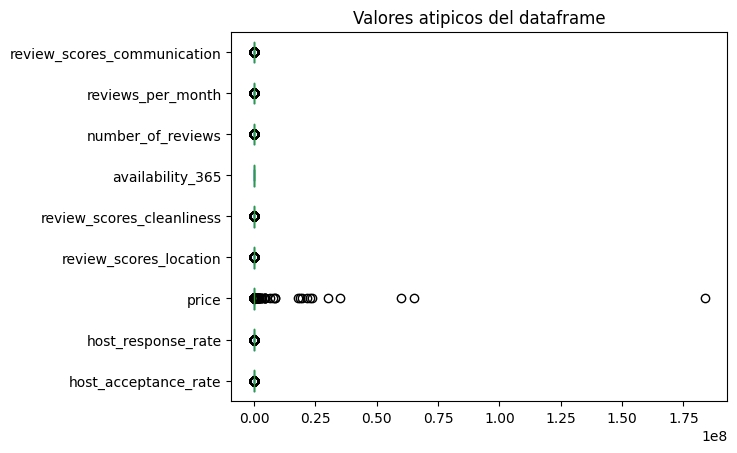

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna dek dataframe
fig = plt.figure(figsize = (15, 8))
filtro_privado.plot(kind='box', vert=False)
plt.title('Valores atipicos del dataframe')
plt.show() #Dibujamos el histograma

In [ ]:
filtro_privado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8202 entries, 7 to 24221
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   room_type                    8202 non-null   object 
 1   host_acceptance_rate         8202 non-null   float64
 2   host_response_rate           8202 non-null   float64
 3   price                        8202 non-null   float64
 4   review_scores_location       8202 non-null   float64
 5   review_scores_cleanliness    8202 non-null   float64
 6   availability_365             8202 non-null   float64
 7   number_of_reviews            8202 non-null   float64
 8   reviews_per_month            8202 non-null   float64
 9   review_scores_communication  8202 non-null   float64
dtypes: float64(9), object(1)
memory usage: 704.9+ KB


**Empieza eliminación de outliers para el grupo compartido**

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna dek dataframe
fig = plt.figure(figsize = (15, 8))
filtro_compartido.plot(kind='box', vert=False)
plt.title('Valores atipicos del dataframe')
plt.show() #Dibujamos el histograma

In [ ]:
#Metodo aplicando desviación estandar. Encuentro los valores extremos
y=filtro_compartido
Limite_Superior_iqr= y.mean() + 3*y.std()
Limite_Inferior_iqr= y.mean() - 3*y.std()
print('Limite superior permitido', Limite_Superior_iqr)
print('Limite inferior permitido', Limite_Inferior_iqr)

In [ ]:
#Encontramos outliers del DataFrame
outliers=filtro_compartido[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers

**Aqui se convierten los outliers en nulos**


In [ ]:
#Obtenemos datos y los outliers se convierten en nulos en el dataframe
data3=filtro_compartido[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3

In [ ]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos

In [ ]:
#Reemplazamos valores atipicos (nulos) del dataframe con 'mean'
#Realizamos una copia del dataframe
data_clean=data2.copy()
data_clean=data_clean.fillna(round(data2.mean(), 1))
data_clean

In [ ]:
#Corroboramos valores nulos
valores_nulos=data_clean.isnull().sum()
valores_nulos

In [ ]:
#Unimos la columna 'DF_2020' con el dataframe
Datos_limpios=pd.concat([data_clean, filtro_compartido], axis=1)
Datos_limpios

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna dek dataframe
fig = plt.figure(figsize = (15, 8))
filtro_compartido.plot(kind='box', vert=False)
plt.title('Valores atipicos del dataframe')
plt.show() #Dibujamos el histograma

**Se crea la primera regresión lineal de las variables del grupo compartido**

<Axes: xlabel='review_scores_communication', ylabel='host_acceptance_rate'>

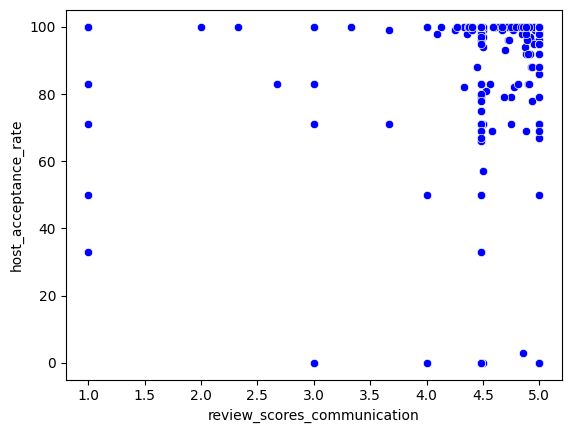

In [ ]:
import seaborn as sns
from turtle import color

sns.scatterplot(x = 'review_scores_communication', y = 'host_acceptance_rate', color = 'blue', data = filtro_compartido)

In [ ]:
#Declaramos las variables dependientes e independientes
Vars_Indep = filtro_compartido[['review_scores_communication']]
Var_Dep = filtro_compartido['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con los variables antes declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.25177381]),
 'rank_': 1,
 'singular_': array([13.73849801]),
 'intercept_': 77.27718904886721}

In [ ]:
filtro_compartido.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 174 to 24173
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   room_type                    293 non-null    object 
 1   host_acceptance_rate         293 non-null    float64
 2   host_response_rate           293 non-null    float64
 3   price                        293 non-null    float64
 4   review_scores_location       293 non-null    float64
 5   review_scores_cleanliness    293 non-null    float64
 6   availability_365             293 non-null    float64
 7   number_of_reviews            293 non-null    float64
 8   reviews_per_month            293 non-null    float64
 9   review_scores_communication  293 non-null    float64
dtypes: float64(9), object(1)
memory usage: 33.3+ KB


In [ ]:
#Predecimos los valores
y_pred=model.predict(X=filtro_compartido[['review_scores_communication']])
y_pred

array([82.89019608, 83.5360581 , 83.42339845, 83.18556143, 83.41088072,
       82.89019608, 82.89019608, 83.5360581 , 83.16052595, 82.89019608,
       82.91017119, 83.38584524, 83.43591619, 82.89019608, 82.89019608,
       82.89019608, 83.26066786, 82.69736964, 82.89019608, 82.91017119,
       82.89019608, 83.3733275 , 83.46095167, 82.89019608, 83.5360581 ,
       82.89019608, 83.5360581 , 83.43591619, 83.5360581 , 83.5360581 ,
       82.89019608, 82.91017119, 78.52896286, 83.36080976, 82.89019608,
       82.89019608, 83.38584524, 83.5360581 , 82.89019608, 78.52896286,
       82.89019608, 82.89019608, 82.89019608, 80.19382203, 83.0103131 ,
       83.02283084, 78.52896286, 83.5360581 , 78.52896286, 82.28428429,
       83.5360581 , 83.5360581 , 83.12297274, 78.52896286, 83.47346941,
       83.03534857, 83.12297274, 81.44559584, 82.89019608, 78.52896286,
       82.98527762, 83.48598714, 83.34829203, 81.03251048, 82.44701488,
       83.12297274, 83.17304369, 82.89019608, 83.5360581 , 82.89

<Axes: xlabel='review_scores_communication', ylabel='host_acceptance_rate'>

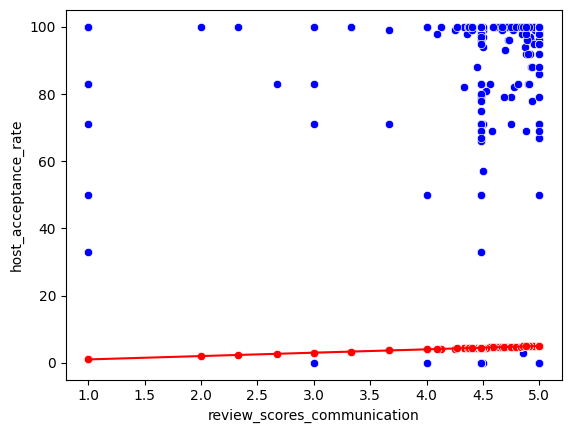

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color='blue', data=filtro_compartido)
sns.scatterplot(x='review_scores_communication', y='review_scores_communication', color='red', data=filtro_compartido)
sns.lineplot(x='review_scores_communication', y='review_scores_communication', color='red', data=filtro_compartido)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0015784398258289478

**Se crea la segunda regresión lineal**

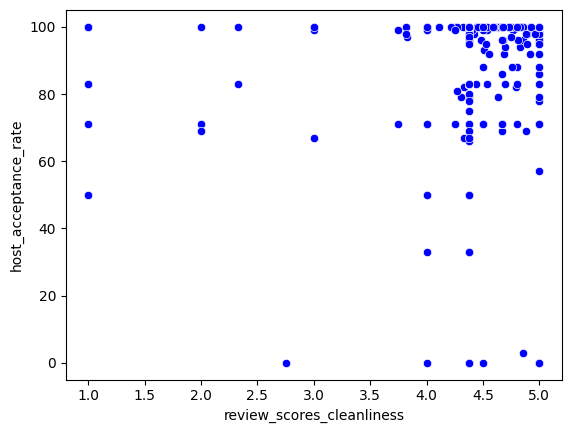

In [ ]:
sns.scatterplot(x = 'review_scores_cleanliness', y = 'host_acceptance_rate', color = 'blue', data = filtro_compartido)

#Declaramos las variables dependientes e independientes
Vars_Indep = filtro_compartido[['review_scores_cleanliness']]
Var_Dep = filtro_compartido['host_acceptance_rate']

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con los variables antes declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

#Predecimos los valores
y_pred=model.predict(X=filtro_compartido[['review_scores_cleanliness']])
y_pred

array([82.89019608, 83.21194288, 83.49721377, 83.0034757 , 83.1570831 ,
       82.89019608, 82.89019608, 83.57401747, 83.03639157, 82.89019608,
       83.02541961, 83.2338868 , 83.48624181, 82.89019608, 82.89019608,
       82.89019608, 83.34360637, 82.83889634, 82.89019608, 83.3874942 ,
       82.89019608, 83.24485875, 83.57401747, 82.89019608, 83.57401747,
       82.89019608, 81.37962605, 83.28874658, 83.57401747, 82.82792439,
       82.89019608, 83.29971854, 79.18523464, 83.42041007, 82.89019608,
       82.89019608, 83.44235398, 83.57401747, 82.89019608, 79.18523464,
       82.89019608, 82.89019608, 82.89019608, 80.64450493, 83.21194288,
       82.27932653, 79.18523464, 83.57401747, 79.18523464, 81.10532713,
       83.29971854, 83.57401747, 83.21194288, 82.47682176, 83.39846615,
       83.35457832, 83.57401747, 81.37962605, 82.89019608, 79.18523464,
       82.95958787, 83.32166245, 83.45332594, 83.57401747, 82.75112069,
       83.57401747, 83.29971854, 82.89019608, 83.29971854, 82.89

<Axes: xlabel='review_scores_cleanliness', ylabel='host_acceptance_rate'>

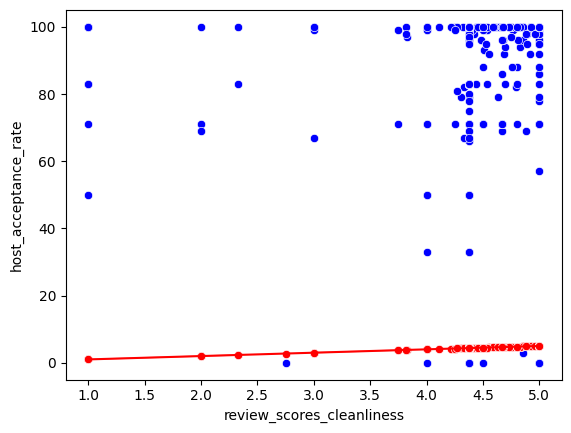

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color='blue', data=filtro_compartido)
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_cleanliness', color='red', data=filtro_compartido)
sns.lineplot(x='review_scores_cleanliness', y='review_scores_cleanliness', color='red', data=filtro_compartido)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0011840201572411724

**Se crea la tercera regresión lineal**

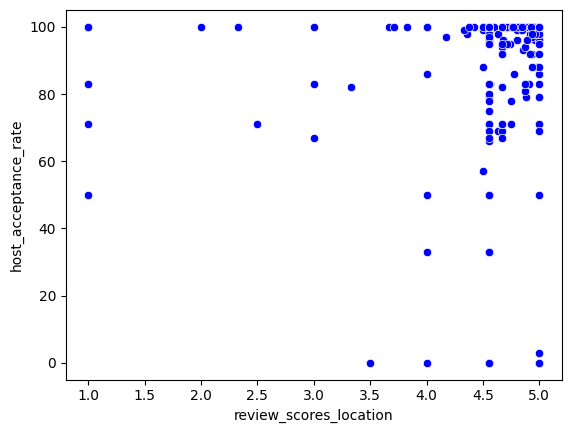

In [ ]:
sns.scatterplot(x = 'review_scores_location', y = 'host_acceptance_rate', color = 'blue', data = filtro_compartido)

#Declaramos las variables dependientes e independientes
Vars_Indep = filtro_compartido[['review_scores_location']]
Var_Dep = filtro_compartido['host_acceptance_rate']

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con los variables antes declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

#Predecimos los valores
y_pred=model.predict(X=filtro_compartido[['review_scores_location']])
y_pred

array([82.89019608, 83.04947149, 82.97942757, 83.06348027, 83.1335242 ,
       82.89019608, 82.89019608, 82.50312889, 83.10550663, 82.89019608,
       83.20356812, 83.16154177, 83.14753298, 82.89019608, 82.89019608,
       82.89019608, 82.97242317, 82.0338346 , 82.89019608, 82.97242317,
       82.89019608, 83.11251102, 83.02845831, 82.89019608, 83.20356812,
       82.89019608, 81.80268965, 83.09149784, 83.20356812, 83.10550663,
       82.89019608, 83.20356812, 80.40181118, 83.20356812, 82.89019608,
       82.89019608, 82.9444056 , 83.20356812, 82.89019608, 80.40181118,
       82.89019608, 82.89019608, 82.89019608, 81.33339537, 82.97242317,
       82.91638803, 81.10225042, 83.20356812, 80.40181118, 82.15290927,
       83.20356812, 83.20356812, 83.20356812, 82.50312889, 83.16854616,
       82.92339243, 83.20356812, 82.27198394, 82.89019608, 80.40181118,
       82.89537486, 83.17555055, 83.14753298, 83.20356812, 82.8533485 ,
       83.20356812, 83.07748906, 82.89019608, 83.20356812, 82.89

<Axes: xlabel='review_scores_location', ylabel='host_acceptance_rate'>

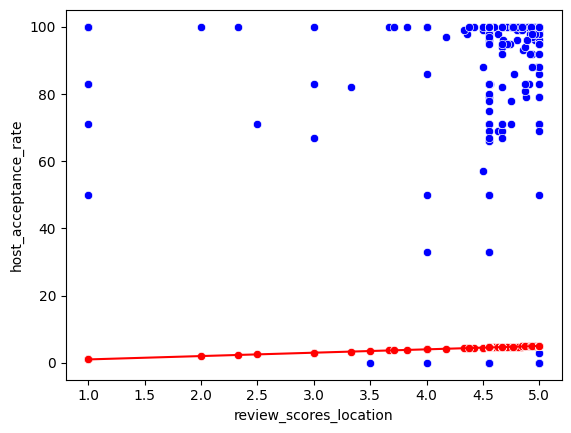

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_location', y='host_acceptance_rate', color='blue', data=filtro_compartido)
sns.scatterplot(x='review_scores_location', y='review_scores_location', color='red', data=filtro_compartido)
sns.lineplot(x='review_scores_location', y='review_scores_location', color='red', data=filtro_compartido)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0004332856702439214

**Se crea la cuarta regresión lineal**

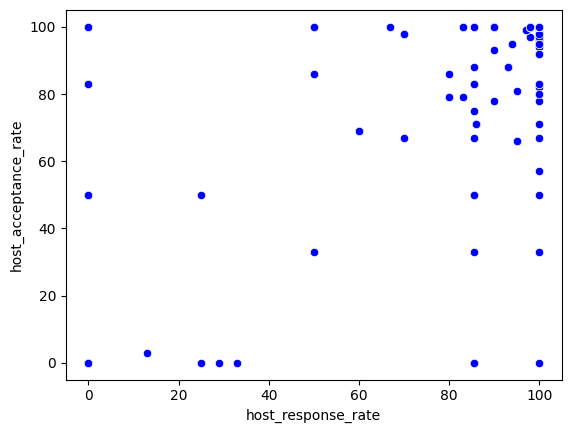

In [ ]:
sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate', color = 'blue', data = filtro_compartido)

#Declaramos las variables dependientes e independientes
Vars_Indep = filtro_compartido[['host_response_rate']]
Var_Dep = filtro_compartido['host_acceptance_rate']

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con los variables antes declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

#Predecimos los valores
y_pred=model.predict(X=filtro_compartido[['host_response_rate']])
y_pred

array([82.89019608, 66.88565452, 84.95250821, 89.46922163, 89.46922163,
       59.20724171, 87.21086492, 66.88565452, 84.95250821, 82.89019608,
       44.30208742, 89.46922163, 89.46922163, 87.21086492, 82.89019608,
       44.30208742, 89.46922163, 89.46922163, 82.89019608, 89.46922163,
       82.89019608, 89.46922163, 89.46922163, 82.89019608, 82.89019608,
       44.30208742, 82.89019608, 89.46922163, 82.89019608, 84.95250821,
       82.89019608, 82.89019608, 82.89019608, 50.17381486, 44.30208742,
       44.30208742, 71.40236794, 89.46922163, 82.89019608, 66.88565452,
       82.89019608, 44.30208742, 82.89019608, 82.89019608, 71.40236794,
       89.46922163, 82.89019608, 80.43579479, 82.89019608, 57.40055634,
       89.46922163, 89.46922163, 89.46922163, 89.46922163, 89.46922163,
       89.46922163, 89.46922163, 89.46922163, 44.30208742, 82.89019608,
       82.89019608, 89.46922163, 89.46922163, 44.30208742, 89.46922163,
       89.46922163, 89.46922163, 44.30208742, 66.88565452, 44.30

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

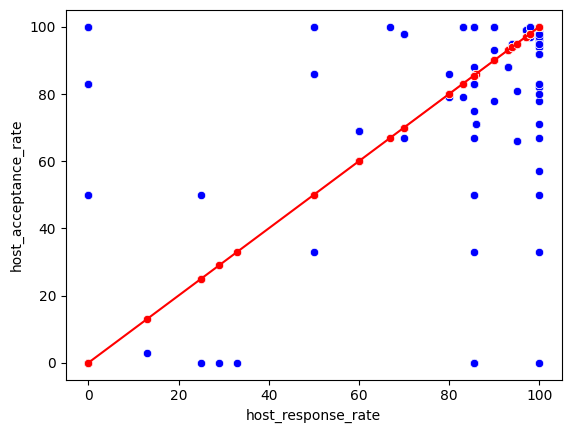

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color='blue', data=filtro_compartido)
sns.scatterplot(x='host_response_rate', y='host_response_rate', color='red', data=filtro_compartido)
sns.lineplot(x='host_response_rate', y='host_response_rate', color='red', data=filtro_compartido)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.18955749550448142

**Se crea la quinta regresión lineal**

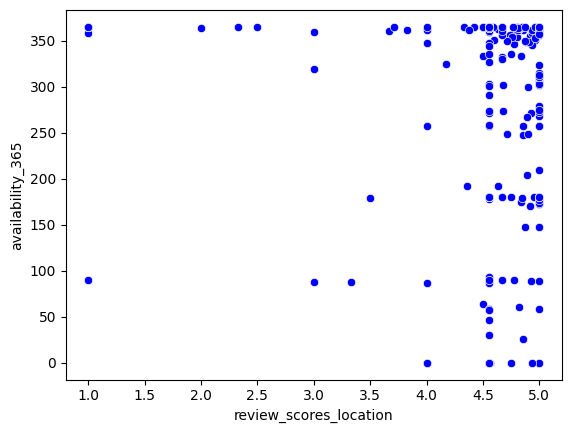

In [ ]:
sns.scatterplot(x = 'review_scores_location', y = 'availability_365', color = 'blue', data = filtro_compartido)

#Declaramos las variables dependientes e independientes
Vars_Indep = filtro_compartido[['review_scores_location']]
Var_Dep = filtro_compartido['availability_365']

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con los variables antes declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

#Predecimos los valores
y_pred=model.predict(X=filtro_compartido[['review_scores_location']])
y_pred

array([295.94539249, 294.95797177, 295.39220591, 294.87112494,
       294.4368908 , 295.94539249, 295.94539249, 298.34499807,
       294.61058446, 295.94539249, 294.00265666, 294.26319715,
       294.35004397, 295.94539249, 295.94539249, 295.94539249,
       295.43562933, 301.25436682, 295.94539249, 295.43562933,
       295.94539249, 294.56716104, 295.08824201, 295.94539249,
       294.00265666, 295.94539249, 302.68733949, 294.69743129,
       294.00265666, 294.61058446, 295.94539249, 294.00265666,
       311.37202231, 294.00265666, 295.94539249, 295.94539249,
       295.60932298, 294.00265666, 295.94539249, 311.37202231,
       295.94539249, 295.94539249, 295.94539249, 305.59670823,
       295.43562933, 295.78301664, 307.0296809 , 294.00265666,
       311.37202231, 300.51616878, 294.00265666, 294.00265666,
       294.00265666, 298.34499807, 294.21977373, 295.73959323,
       294.00265666, 299.77797074, 295.94539249, 311.37202231,
       295.91328688, 294.17635032, 294.35004397, 294.00

<Axes: xlabel='review_scores_location', ylabel='availability_365'>

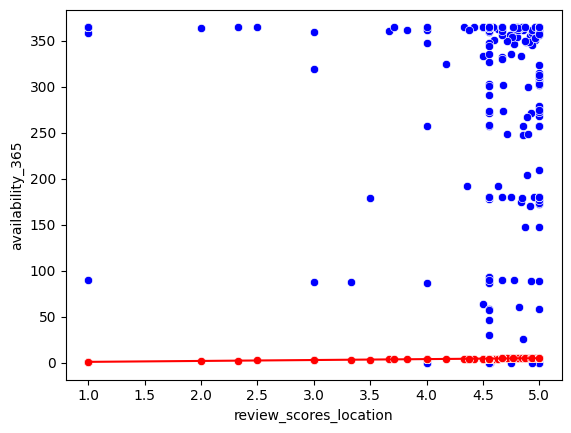

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_location', y='availability_365', color='blue', data=filtro_compartido)
sns.scatterplot(x='review_scores_location', y='review_scores_location', color='red', data=filtro_compartido)
sns.lineplot(x='review_scores_location', y='review_scores_location', color='red', data=filtro_compartido)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0009271837162695418

**Se crea la sexta regresión lineal**

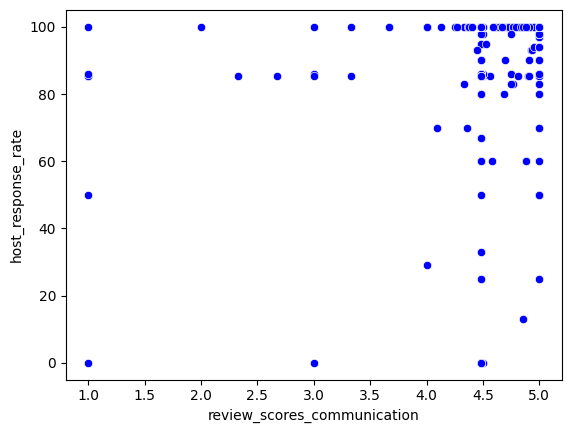

In [ ]:
sns.scatterplot(x = 'review_scores_communication', y = 'host_response_rate', color = 'blue', data = filtro_compartido)

#Declaramos las variables dependientes e independientes
Vars_Indep = filtro_compartido[['review_scores_communication']]
Var_Dep = filtro_compartido['host_response_rate']

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con los variables antes declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

#Predecimos los valores
y_pred=model.predict(X=filtro_compartido[['review_scores_communication']])
y_pred

array([85.43404255, 87.44425505, 87.09360768, 86.35335211, 87.05464686,
       85.43404255, 85.43404255, 87.44425505, 86.27543047, 85.43404255,
       85.49621407, 86.97672522, 87.1325685 , 85.43404255, 85.43404255,
       85.43404255, 86.58711702, 84.83388014, 85.43404255, 85.49621407,
       85.43404255, 86.9377644 , 87.21049014, 85.43404255, 87.44425505,
       85.43404255, 87.44425505, 87.1325685 , 87.44425505, 87.44425505,
       85.43404255, 85.49621407, 71.85992721, 86.89880358, 85.43404255,
       85.43404255, 86.97672522, 87.44425505, 85.43404255, 71.85992721,
       85.43404255, 85.43404255, 85.43404255, 77.04171622, 85.80790063,
       85.84686145, 71.85992721, 87.44425505, 71.85992721, 83.54817309,
       87.44425505, 87.44425505, 86.15854801, 71.85992721, 87.24945096,
       85.88582227, 86.15854801, 80.93779818, 85.43404255, 71.85992721,
       85.72997899, 87.28841178, 86.85984276, 79.65209113, 84.05466375,
       86.15854801, 86.31439129, 85.43404255, 87.44425505, 85.43

<Axes: xlabel='review_scores_communication', ylabel='host_response_rate'>

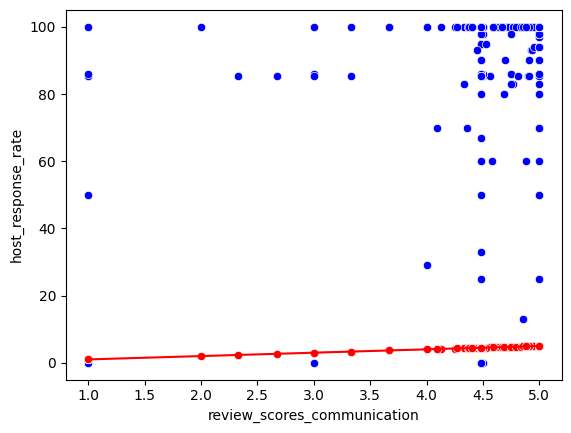

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_communication', y='host_response_rate', color='blue', data=filtro_compartido)
sns.scatterplot(x='review_scores_communication', y='review_scores_communication', color='red', data=filtro_compartido)
sns.lineplot(x='review_scores_communication', y='review_scores_communication', color='red', data=filtro_compartido)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.016456466416662208

**Se crea la primera regresión lineal del grupo privado.**

<Axes: xlabel='review_scores_communication', ylabel='host_acceptance_rate'>

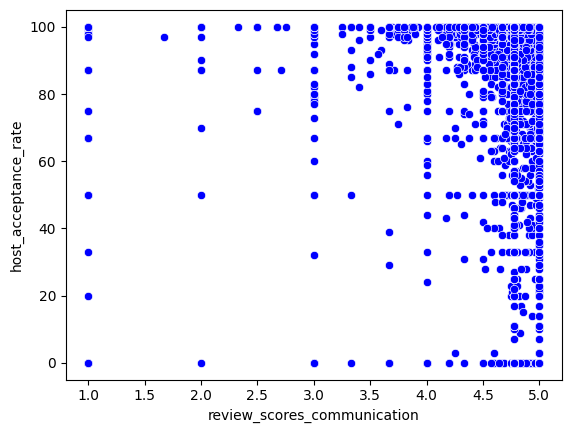

In [ ]:
import seaborn as sns
from turtle import color

sns.scatterplot(x = 'review_scores_communication', y = 'host_acceptance_rate', color = 'blue', data = filtro_privado)

In [ ]:
#Declaramos las variables dependientes e independientes
Vars_Indep = filtro_privado[['review_scores_communication']]
Var_Dep = filtro_privado['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con los variables antes declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.8829309]),
 'rank_': 1,
 'singular_': array([43.05593316]),
 'intercept_': 82.95992723047442}

In [ ]:
filtro_privado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8202 entries, 7 to 24221
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   room_type                    8202 non-null   object 
 1   host_acceptance_rate         8202 non-null   float64
 2   host_response_rate           8202 non-null   float64
 3   price                        8202 non-null   float64
 4   review_scores_location       8202 non-null   float64
 5   review_scores_cleanliness    8202 non-null   float64
 6   availability_365             8202 non-null   float64
 7   number_of_reviews            8202 non-null   float64
 8   reviews_per_month            8202 non-null   float64
 9   review_scores_communication  8202 non-null   float64
dtypes: float64(9), object(1)
memory usage: 962.9+ KB


In [ ]:
#Predecimos los valores
y_pred=model.predict(X=filtro_privado[['review_scores_communication']])
y_pred

array([87.33043519, 87.02140938, 87.19799556, ..., 87.17691567,
       87.17691567, 87.17691567])

<Axes: xlabel='review_scores_communication', ylabel='host_acceptance_rate'>

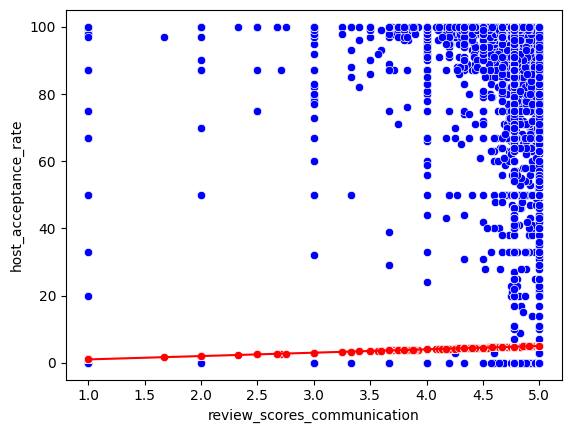

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color='blue', data=filtro_privado)
sns.scatterplot(x='review_scores_communication', y='review_scores_communication', color='red', data=filtro_privado)
sns.lineplot(x='review_scores_communication', y='review_scores_communication', color='red', data=filtro_privado)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.00030396174884539384

**Se crea la segunda regresión lineal privada**

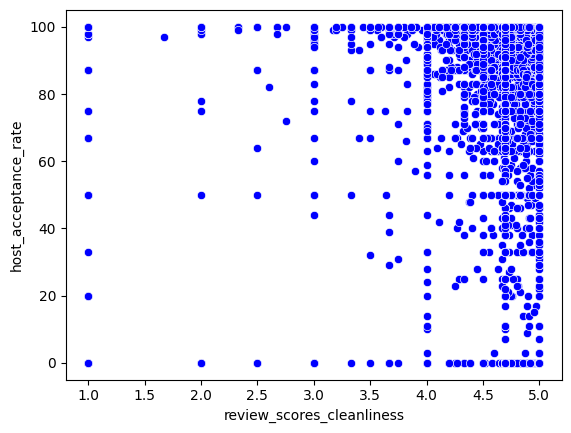

In [ ]:
sns.scatterplot(x = 'review_scores_cleanliness', y = 'host_acceptance_rate', color = 'blue', data = filtro_privado)

#Declaramos las variables dependientes e independientes
Vars_Indep = filtro_privado[['review_scores_cleanliness']]
Var_Dep = filtro_privado['host_acceptance_rate']

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con los variables antes declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

#Predecimos los valores
y_pred=model.predict(X=filtro_privado[['review_scores_cleanliness']])
y_pred

array([87.49240475, 86.39810073, 87.02341732, ..., 87.17691567,
       87.17691567, 87.17691567])

<Axes: xlabel='review_scores_cleanliness', ylabel='host_acceptance_rate'>

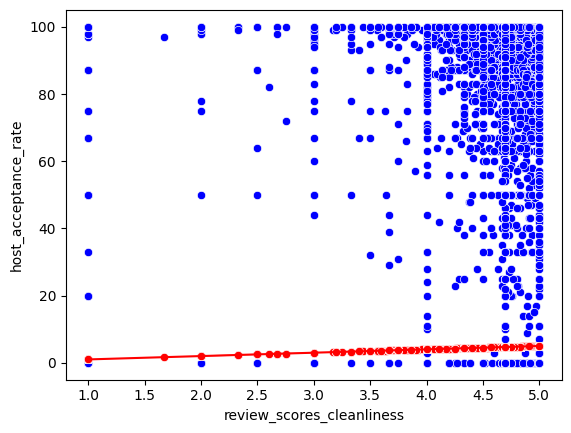

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color='blue', data=filtro_privado)
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_cleanliness', color='red', data=filtro_privado)
sns.lineplot(x='review_scores_cleanliness', y='review_scores_cleanliness', color='red', data=filtro_privado)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0010321538864065394

**Se crea la tercera regresión lineal privada**

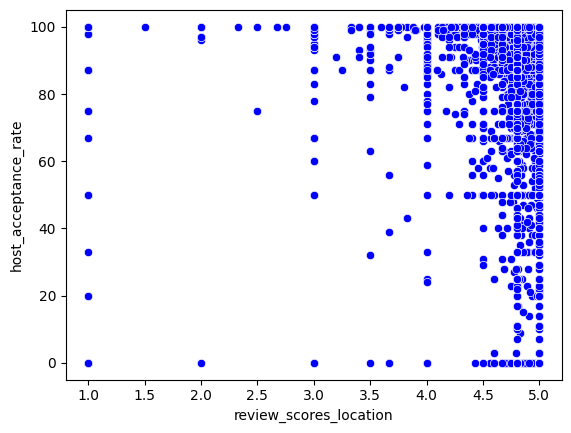

In [ ]:
sns.scatterplot(x = 'review_scores_location', y = 'host_acceptance_rate', color = 'blue', data = filtro_privado)

#Declaramos las variables dependientes e independientes
Vars_Indep = filtro_privado[['review_scores_location']]
Var_Dep = filtro_privado['host_acceptance_rate']

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con los variables antes declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

#Predecimos los valores
y_pred=model.predict(X=filtro_privado[['review_scores_location']])
y_pred

array([87.32026503, 87.17413729, 86.75662947, ..., 87.17691567,
       87.17691567, 87.17691567])

<Axes: xlabel='review_scores_location', ylabel='host_acceptance_rate'>

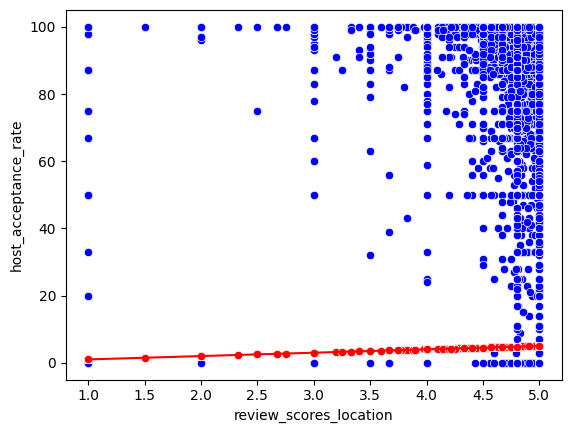

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_location', y='host_acceptance_rate', color='blue', data=filtro_privado)
sns.scatterplot(x='review_scores_location', y='review_scores_location', color='red', data=filtro_privado)
sns.lineplot(x='review_scores_location', y='review_scores_location', color='red', data=filtro_privado)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.00035823144785773753

**Se crea la cuarta regresión lineal privada**

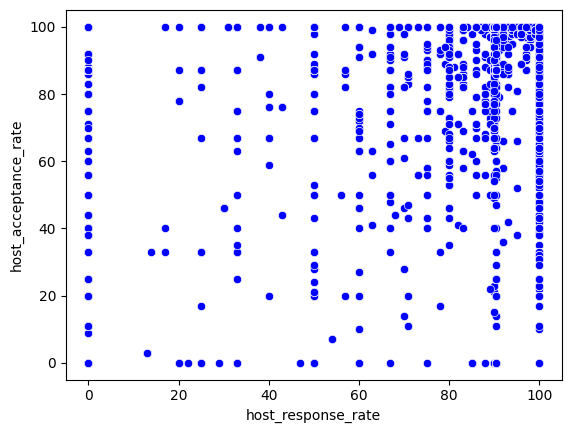

In [ ]:
sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate', color = 'blue', data = filtro_privado)

#Declaramos las variables dependientes e independientes
Vars_Indep = filtro_privado[['host_response_rate']]
Var_Dep = filtro_privado['host_acceptance_rate']

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con los variables antes declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

#Predecimos los valores
y_pred=model.predict(X=filtro_privado[['host_response_rate']])
y_pred

array([91.09856418, 87.17691567, 49.87611923, ..., 91.09856418,
       87.17691567, 87.17691567])

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

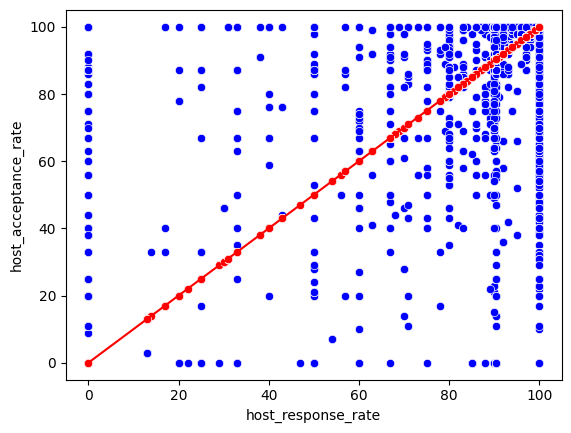

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color='blue', data=filtro_privado)
sns.scatterplot(x='host_response_rate', y='host_response_rate', color='red', data=filtro_privado)
sns.lineplot(x='host_response_rate', y='host_response_rate', color='red', data=filtro_privado)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.14114878985306323

**Se crea la quinta regresión lineal privada**

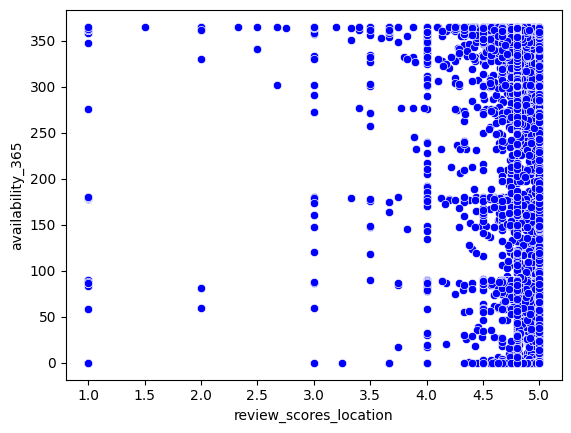

In [ ]:
sns.scatterplot(x = 'review_scores_location', y = 'availability_365', color = 'blue', data = filtro_privado)

#Declaramos las variables dependientes e independientes
Vars_Indep = filtro_privado[['review_scores_location']]
Var_Dep = filtro_privado['availability_365']

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con los variables antes declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

#Predecimos los valores
y_pred=model.predict(X=filtro_privado[['review_scores_location']])
y_pred

array([250.35751585, 253.10316724, 260.9478855 , ..., 253.05096318,
       253.05096318, 253.05096318])

<Axes: xlabel='review_scores_location', ylabel='availability_365'>

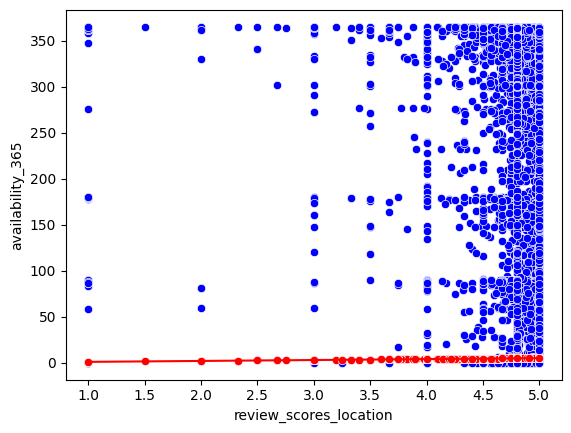

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_location', y='availability_365', color='blue', data=filtro_privado)
sns.scatterplot(x='review_scores_location', y='review_scores_location', color='red', data=filtro_privado)
sns.lineplot(x='review_scores_location', y='review_scores_location', color='red', data=filtro_privado)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.004681391345634056

**Se crea la sexta regresión lineal privada**

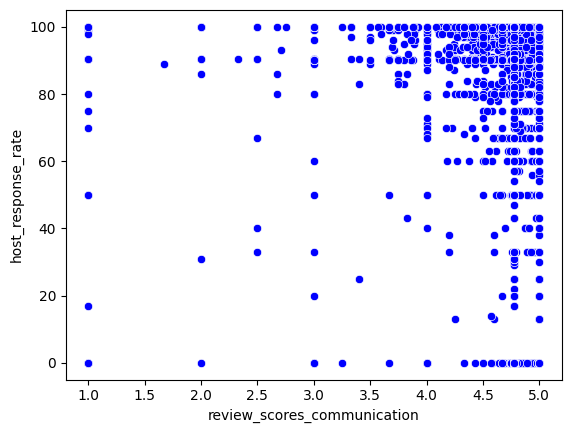

In [ ]:
sns.scatterplot(x = 'review_scores_communication', y = 'host_response_rate', color = 'blue', data = filtro_privado)

#Declaramos las variables dependientes e independientes
Vars_Indep = filtro_privado[['review_scores_communication']]
Var_Dep = filtro_privado['host_response_rate']

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con los variables antes declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

#Predecimos los valores
y_pred=model.predict(X=filtro_privado[['review_scores_communication']])
y_pred

array([91.44191891, 89.51895483, 90.61779145, ..., 90.48661836,
       90.48661836, 90.48661836])

<Axes: xlabel='review_scores_communication', ylabel='host_response_rate'>

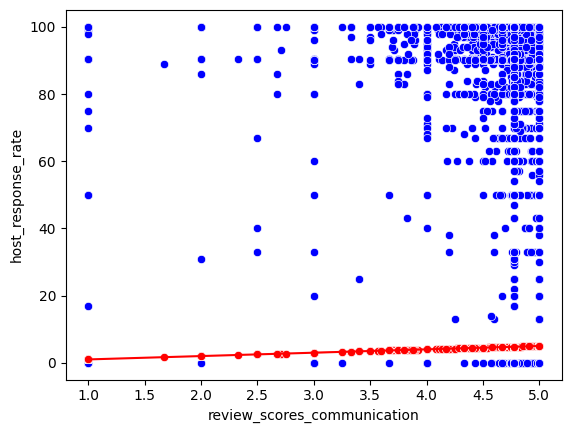

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_communication', y='host_response_rate', color='blue', data=filtro_privado)
sns.scatterplot(x='review_scores_communication', y='review_scores_communication', color='red', data=filtro_privado)
sns.lineplot(x='review_scores_communication', y='review_scores_communication', color='red', data=filtro_privado)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.01416974687575856